### Building Good Training Sets – Data Preprocessing
##### Submitted by: Lance Dominic C. Raquel

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone
from itertools import combinations

warnings.filterwarnings("ignore")
%matplotlib inline

###### Part I – Dealing with missing data (5 pts.)
###### 1.) Import the data from the file “employees.csv” using pandas.


In [4]:
df = pd.read_csv('employees.csv')
df

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-Jun-07,SH_CLERK,2600,-,124,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,13-Jan-08,SH_CLERK,2600,-,124,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,17-Sep-03,AD_ASST,4400,-,101,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,17-Feb-04,MK_MAN,13000,-,100,20.0
4,202,Pat,Fay,PFAY,603.123.6666,17-Aug-05,MK_REP,6000,-,201,NaN
5,203,Susan,Mavris,SMAVRIS,515.123.7777,07-Jun-02,HR_REP,6500,-,101,40.0
6,204,Hermann,Baer,HBAER,515.123.8888,07-Jun-02,PR_REP,10000,-,101,70.0
7,205,Shelley,Higgins,SHIGGINS,515.123.8080,07-Jun-02,AC_MGR,12008,-,101,110.0
8,206,William,Gietz,WGIETZ,515.123.8181,07-Jun-02,AC_ACCOUNT,8300,-,205,110.0
9,100,Steven,King,SKING,515.123.4567,17-Jun-03,AD_PRES,24000,-,-,90.0


###### 2.) Address missing values in the dataset by removing rows containing NaN values.

In [5]:
df = df.dropna(axis=0)
df

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-Jun-07,SH_CLERK,2600,-,124,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,13-Jan-08,SH_CLERK,2600,-,124,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,17-Sep-03,AD_ASST,4400,-,101,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,17-Feb-04,MK_MAN,13000,-,100,20.0
5,203,Susan,Mavris,SMAVRIS,515.123.7777,07-Jun-02,HR_REP,6500,-,101,40.0
6,204,Hermann,Baer,HBAER,515.123.8888,07-Jun-02,PR_REP,10000,-,101,70.0
7,205,Shelley,Higgins,SHIGGINS,515.123.8080,07-Jun-02,AC_MGR,12008,-,101,110.0
8,206,William,Gietz,WGIETZ,515.123.8181,07-Jun-02,AC_ACCOUNT,8300,-,205,110.0
9,100,Steven,King,SKING,515.123.4567,17-Jun-03,AD_PRES,24000,-,-,90.0
10,101,Neena,Kochhar,NKOCHHAR,515.123.4568,21-Sep-05,AD_VP,17000,-,100,90.0


##### Part II – Mapping ordinal features (5 pts.)

###### 1. Import the data from the "diabetes.csv" file using the pandas library.

In [6]:
df2 = pd.read_csv('diabetes.csv')
df2

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Laura Bennett,6,148,72,35,0,33.6,0.627,50,Yes
1,Wesley Green,1,85,66,29,0,26.6,0.351,31,NO
2,Tina Johnson DDS,8,183,64,0,0,23.3,0.672,32,Yes
3,Troy Fisher,1,89,66,23,94,28.1,0.167,21,NO
4,Nathan Brown,0,137,40,35,168,43.1,2.288,33,Yes
...,...,...,...,...,...,...,...,...,...,...
763,Tonya Hamilton,10,101,76,48,180,32.9,0.171,63,NO
764,Holly Guerra,2,122,70,27,0,36.8,0.340,27,NO
765,Melissa Lopez,5,121,72,23,112,26.2,0.245,30,NO
766,Wanda Baker,1,126,60,0,0,30.1,0.349,47,Yes


###### 2. Map the outcome column to binary values.

In [7]:
df2['Outcome'].value_counts()

NO     500
Yes    268
Name: Outcome, dtype: int64

In [8]:
df2['Outcome'] = df2['Outcome'].map({'Yes': 1, 'NO': 0})
df2['Outcome'].astype('category')

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: category
Categories (2, int64): [0, 1]

##### Part III – Identifying and Removing Outliers (15 pts.)
###### 1. Detect the outliers in each column (except the Name column) of the diabetes.csv dataset using horizontal boxplots.

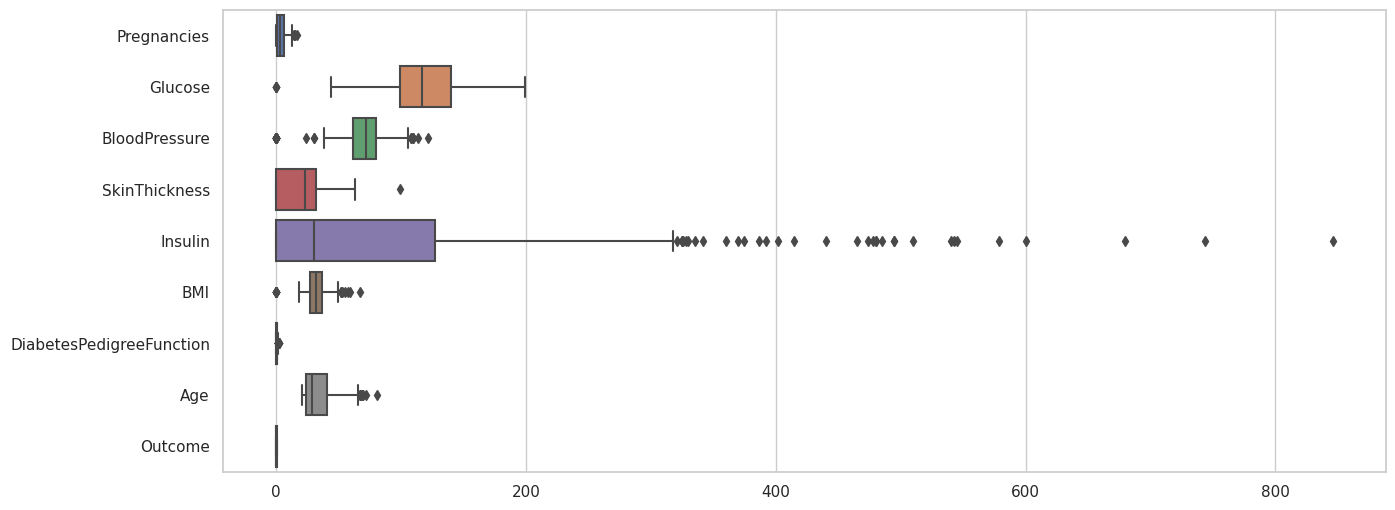

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.boxplot(data=df2, orient="h")
plt.show()

###### 2. Drop the outliers by utilizing the Inter Quartile Range (IQR) approach.

In [10]:
Q1=df2.quantile(0.25)
Q3=df2.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [11]:
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape,df2_out.shape

((768, 10), (639, 10))

###### 3. Compare the dimensions of the original dataset with those of the cleaned dataset.

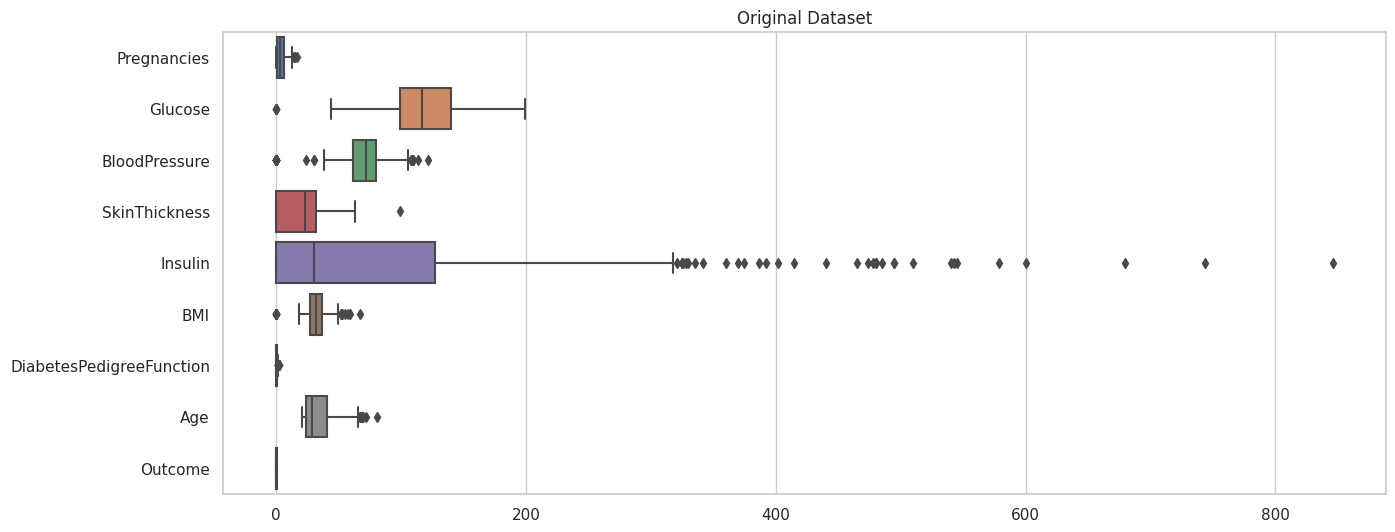

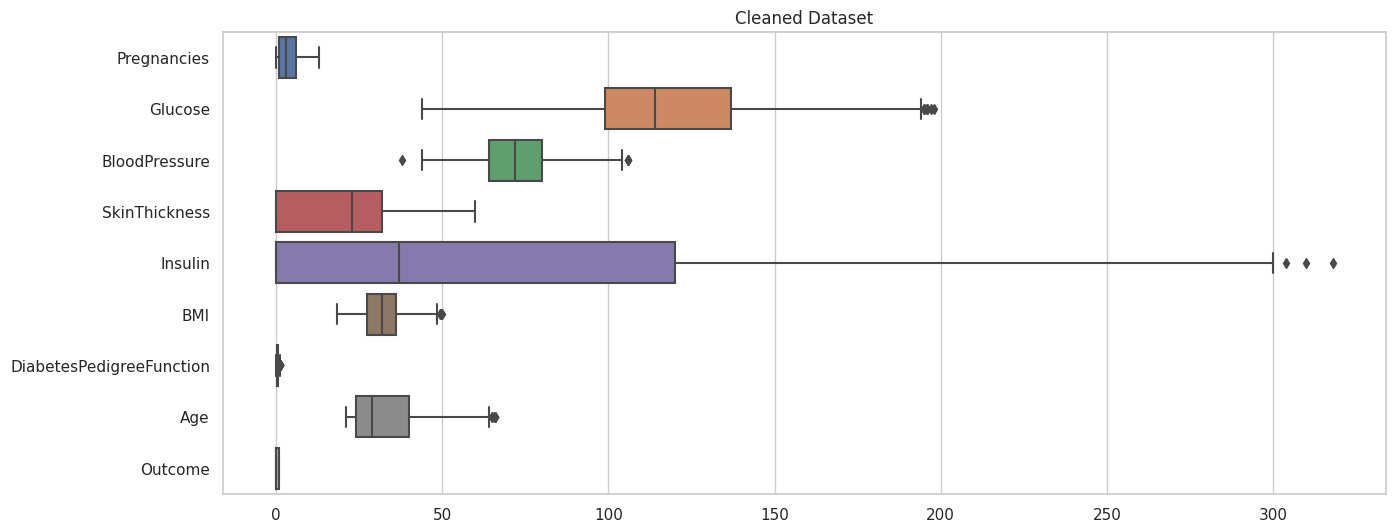

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.boxplot(data=df2, orient="h")
plt.title("Original Dataset")
plt.show()

sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.boxplot(data=df2_out, orient="h")
plt.title("Cleaned Dataset")
plt.show()

In [13]:
print(f'Original dataset shape: {df2.shape} \nCleaned dataset shape: {df2_out.shape}')

Original dataset shape: (768, 10) 
Cleaned dataset shape: (639, 10)


#####  Part IV – Feature Importance Assessment and Application of SBS and Logistic Regression (20 pts.)

###### 1. Utilize the Random Forest method to assess feature importance (excluding the Name column) and generate a bar plot that ranks the various features in the diabetes.csv dataset.

In [14]:
y = df2.pop('Outcome')
X = df2.drop('Name', axis=1)

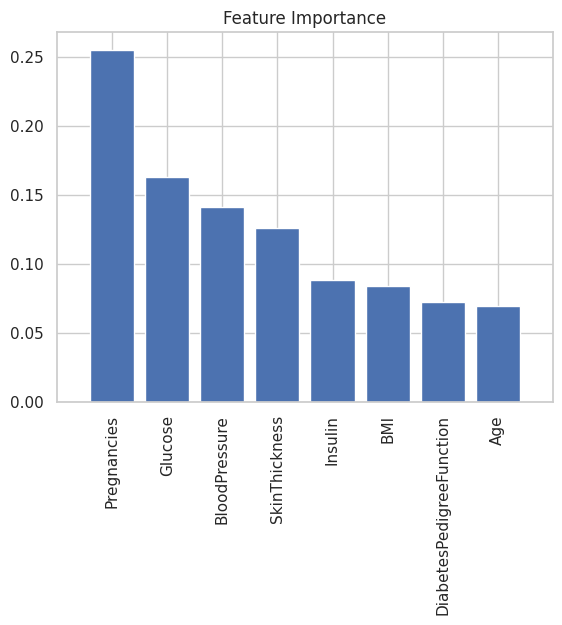

<Figure size 1500x600 with 0 Axes>

In [15]:
feat_labels = X
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), feat_labels, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.figure(figsize=(15, 6))
plt.show()

###### 2. Split the dataset to training data and test set with 30% test size and random state 1.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print('Labels count y_train:', np.bincount(y_train))
print('Labels count y_test:', np.bincount(y_test))

Labels count y_train: [350 187]
Labels count y_test: [150  81]


###### 3. Implement the standard scaling method

In [17]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std
X_test_std

array([[-1.13599759,  0.29793135, -0.15693059, ...,  0.30283732,
        -0.84639663, -0.95731525],
       [-1.13599759,  1.3560194 ,  1.14456324, ...,  2.70023747,
        -0.16090737, -0.87234363],
       [ 0.93692228, -0.60455551,  0.27690069, ...,  0.68908512,
        -0.82265675,  0.99703196],
       ...,
       [-0.83986618,  1.57386105, -0.04847277, ...,  1.38166739,
         0.65515128, -0.44748554],
       [ 0.34465946,  1.13817774,  0.81918978, ...,  0.9821007 ,
        -0.25586692, -0.36251392],
       [ 0.04852805,  0.92033608,  1.14456324, ..., -0.3098316 ,
        -0.55558301,  0.2322874 ]])

###### 4. Train the Logistic Regression model by fitting the training dataset using the LogisticRegression class and the fit method from sklearn.svm with penalty='l1' and solver='liblinear'.

In [18]:
lr = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
lr.fit(X_train_std, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

###### 5. Print the accuracy of the Logistic Regression model on both the training dataset and the test dataset.

In [19]:
print(f'Training accuracy: {lr.score(X_train_std, y_train):.2f}')
print(f'Test accuracy: {lr.score(X_test_std, y_test):.2f}')

Training accuracy: 0.79
Test accuracy: 0.76


###### 6. Implement the Sequential Backward Selection (SBS) algorithm on the training dataset and create a graph depicting Accuracy vs. Number of Features plot.

In [20]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)


k_feat = [len(k) for k in sbs.subsets_]

k5 = list(sbs.subsets_[7])
print('top 5 features:\n', df2.columns[1:][k5])

knn.fit(X_train_std, y_train)
print('\nAll features:\n')
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k5], y_train)
print('\nTop 5 features:\n')
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

top 5 features:
 Index(['Glucose'], dtype='object')

All features:

Training accuracy: 0.851024208566108
Test accuracy: 0.7056277056277056

Top 5 features:

Training accuracy: 0.7486033519553073
Test accuracy: 0.6926406926406926


###### Question: Which algorithm yields a higher accuracy, SBS or Logistic Regression?

###### Answer: The SBS yields a higher accuracy; otherwise, Logistic Regression does.